In [1]:
import numpy as np
import pandas as pd
import fine_tuning
import sys
import IPython.display
sys.path.append("..")
import utils.pos_utils as pos_utils

### Training language and general setup

In [2]:
data_path = "../data/ud/"
short_model_name = input("Short model name: ")
experiment = input("Experiment: ")
task = "pos"
print("\n")
checkpoints_path = "E:/TFM_CCIL/checkpoints_experimental/"
        
#training_lang = fine_tuning.get_global_training_state(data_path, short_model_name, experiment, checkpoints_path)
training_lang = "id"
trainer = fine_tuning.Trainer(training_lang, data_path, task, short_model_name)

Short model name: mbert
Experiment: acl




### Model setup

In [3]:
# Model parameters
max_length = 256
batch_size = 8
learning_rate = 2e-5
epochs = 30
tagset = pos_utils.get_ud_tags()
num_labels = len(tagset)

# Model creation
trainer.build_model(max_length, batch_size, learning_rate, epochs, num_labels, tagset=tagset, eval_batch_size=64)

# Checkpoint for best model weights
trainer.setup_checkpoint(checkpoints_path)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertForTokenClassification: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFBertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['dropout_37', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Successfully built bert-base-multilingual-cased
Checkpoint file: E:/TFM_CCIL/checkpoints_experimental/id/bert-base-multilingual-cased_pos_checkpoint.hdf5
Temp weights file: E:/TFM_CCIL/checkpoints_experimental/id/bert-base-multilingual-cased_temp.hdf5


### Data preparation

In [4]:
limit = None
train_eval_subsample = None
train_subsample = 2

trainer.prepare_data(limit=limit, train_eval_subsample=train_eval_subsample, train_subsample=train_subsample)

print("Train examples:", len(trainer.train_data))

# Print an example sentence for sanity
example_batch = trainer.train_dataset.as_numpy_iterator().next()
for token, label in zip(example_batch[0]["input_ids"][0], example_batch[1][0]):
    if not token:
        break
    elif token == example_batch[0]["input_ids"][0][10]:
        print("...")
        break
    print("{:<25}{:<20}".format(trainer.tokenizer.decode(int(token)), tagset[label]))


Train examples: 2
K r                      PROPN               
# # o g h                PROPN               
j u g a                  ADV                 
y a n g                  PRON                
p e r t a m a            ADJ                 
k a l i                  NOUN                
m e m b u a t            VERB                
s t u d i                NOUN                
p e r                    NOUN                
# # b a n d              NOUN                
...


In [10]:
trainer.eval_info["train_eval"]

{'all_words': ['Keberadaan',
  'wikinomics',
  'telah',
  'menggeser',
  'peran',
  'institusi',
  'bisnis',
  ',',
  'sosial',
  ',',
  'dan',
  'menyebabkan',
  'penurunan',
  'akan',
  'permintaan',
  'tenaga',
  'kerja',
  '.',
  'Krogh',
  'juga',
  'yang',
  'pertama',
  'kali',
  'membuat',
  'studi',
  'perbandingan',
  'pada',
  'hewan',
  '.'],
 'all_labels': [9,
  2,
  4,
  17,
  9,
  9,
  9,
  14,
  9,
  14,
  6,
  17,
  9,
  4,
  9,
  9,
  9,
  14,
  13,
  4,
  12,
  2,
  9,
  17,
  9,
  9,
  3,
  9,
  14],
 'real_tokens': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  256,
  257,
  258,
  259,
  260,
  261,
  262,
  263,
  264,
  265,
  266,
  267,
  268,
  269],
 'subword_locs': [[0, 3],
  [3, 6],
  [7, 10],
  [11, 14],
  [20, 23],
  [24, 27],
  [30, 32],
  [38, 41]]}

In [11]:
trainer.train_data

[{'id': 'train-s111',
  'tokens': ['Keberadaan',
   'wikinomics',
   'telah',
   'menggeser',
   'peran',
   'institusi',
   'bisnis',
   ',',
   'sosial',
   ',',
   'dan',
   'menyebabkan',
   'penurunan',
   'akan',
   'permintaan',
   'tenaga',
   'kerja',
   '.'],
  'tags': ['NOUN',
   'ADJ',
   'ADV',
   'VERB',
   'NOUN',
   'NOUN',
   'NOUN',
   'PUNCT',
   'NOUN',
   'PUNCT',
   'CCONJ',
   'VERB',
   'NOUN',
   'ADV',
   'NOUN',
   'NOUN',
   'NOUN',
   'PUNCT']},
 {'id': 'train-s7',
  'tokens': ['Krogh',
   'juga',
   'yang',
   'pertama',
   'kali',
   'membuat',
   'studi',
   'perbandingan',
   'pada',
   'hewan',
   '.'],
  'tags': ['PROPN',
   'ADV',
   'PRON',
   'ADJ',
   'NOUN',
   'VERB',
   'NOUN',
   'NOUN',
   'ADP',
   'NOUN',
   'PUNCT']}]

### Training

Elapsed:                 2:03:02                  
Estimated remaining:     1:47:40                  



History:

Best dev score so far: 0.9263

Epoch               Loss                Train score         Dev score           
0                   nan                 0.8710              0.8694              
1                   0.0452              0.9180              0.9081              
2                   0.0322              0.9273              0.9115              
3                   0.0281              0.9408              0.9221              
4                   0.0239              0.9487              0.9211              
5                   0.0213              0.9551              0.9200              
6                   0.0182              0.9624              0.9220              
7                   0.0158              0.9706              0.9232              
8                   0.0131              0.9717              0.9198              
9                   0.0113              0.9809              0.9252              
10                  0.0102              0.9819              0.9243 

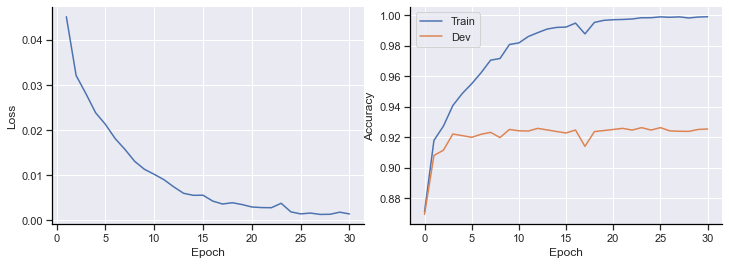


Epoch 31
 11/560 [..............................] - ETA: 5:12 - loss: 6.3841e-04

KeyboardInterrupt: 

In [5]:
trainer.setup_training(resume_from_temp=True)
trainer.train()

Make definitive or delete

In [6]:
trainer.compare_checkpoint()
command = input("\nChoose action:\n0.Make definitive\n1.Delete\n")
if command == "0":
    trainer.make_definitive()
elif command == "1":
    trainer.delete_checkpoint()

Current dev score: 0.9263

Weight files found:

E:/TFM_CCIL/checkpoints_experimental/id\tf-xlm-roberta-base_pos_checkpoint.hdf5
No 'params' file found for tf-xlm-roberta-base_pos_checkpoint.hdf5

No better weights found.

Choose action:
0.Make definitive
1.Delete
0
